# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [1]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [15]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf
import numpy as np 

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.
> 1. One of the networks I think of first is the internet (www). The nodes are different web pages and the lins are the links to other pages. 
> 2. Another example of a real network is your friendship network. Where, for instance, I am the node and my friendship wither another person is the link. 
> 3. Within transportation one could also think of a transportation network, i.e., an airport network. Then the airport is the node and flights are the links. 

> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions: The network I am the most interest in is the financial network. 
>   * What are its nodes and links? The nodes could for instance be different financial institutions, i.e. a bank. The links could me and you and other corporations. Everything that links the different institutions together. 
>   * How large is it? I do not know if there is a word for it. You can probably argue that the network above can be divided out to infinitely many other networks. 
>   * Can be mapped out? I think you have to be a bit more specific in order to map out one of the above-mentioned networks. At leat if you want it to be useful as well. 
>   * Why do you care about it? I have always had a keen interest in finance and the macro economy. 

> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 
Even though I do not know much about it, I think researh in biological networks could have a very big impact. The text also describes how biological network science is being used to find a cure for cancer and other devasting deseases. 

> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why? Yes, for instance in a financial network. The nodes are banks and other institutions and the links are potential customers. In this L would also be stricly smaller than Lmax. 

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

4
2


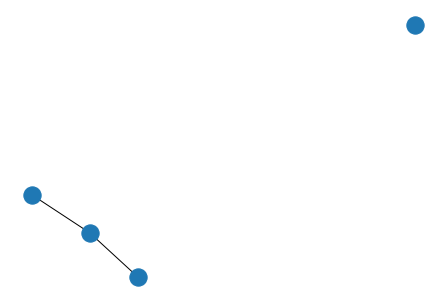

3


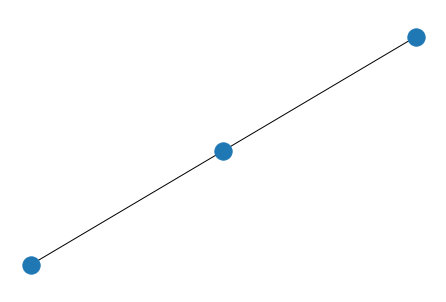

In [3]:
G = nx.Graph()

#Adding some nodes 
G.add_node(2)
G.add_node(3)
G.add_node(179)
G.add_node(199)

#Adding some edges
G.add_edge(2,3)
G.add_edge(3,179)

#Number of nodes and edges
print(G.number_of_nodes())
print(G.number_of_edges())

#Plot G 
nx.draw(G)
plt.show()

#Delete a node 
G.remove_node(199)
print(G.number_of_nodes())

#Plot the new G 
nx.draw(G)
plt.show()






> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
> An ER network is a randomly chosen network with n nodes and m edges. From this [link](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html) it is obvious that an ER network can be depicted using several methods. 
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

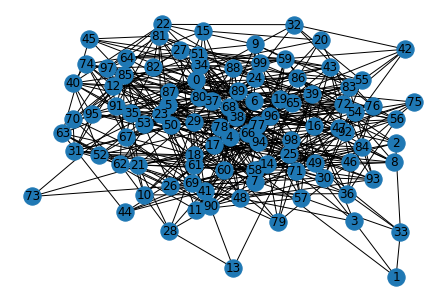

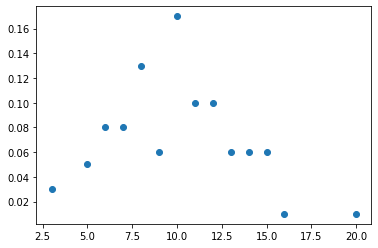

In [2]:
n = 100 # 100 nodes
p = 0.1  # probability of edge creation 


# Plot the network 
ER = nx.gnp_random_graph(n, p)
nx.draw(ER, with_labels=True)
plt.show()

# First I need to compute the distribution 

import collections 
from scipy.special import comb 

def degree_distribution(network):
    
    #Number of nodes 
    num_node = network.number_of_nodes()
    
    #Empirical probability 
    degree = sorted([d for n, d in network.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree)
    degree, degreeCount = zip(*degreeCount.items())
    
    emp_prob = [c/num_node for c in degreeCount]
    
    
    return degree, emp_prob

# Use my function to calucate the degree distribution 
deg, eprob = degree_distribution(ER)

# Visualize the degree distribution 
plt.plot(deg, eprob, 'o')
plt.show()

 **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.

> The BA model can be used to generate random scale-free networks (power-law). Many real world networks are thought to be aprroximately scale-free, hence the BA model is used to explain nodes in, i.e., the WWW. I use the function `barabasi_albert_graph(n, m[, seed])` 

2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
> For 2-4 see cell below. 
5. Explain the main difference(s) you observe, when comparing to the ER network.
> The main difference is evident when comparing the two distributions. The degree distribution of the ER network is normally distributed while the BA network has a very long tail. That is revealed when plotting the number of nodes on a logarithmic scale. 
6. Are there other measures we could have used to describe the ER and BA networks further?
> 

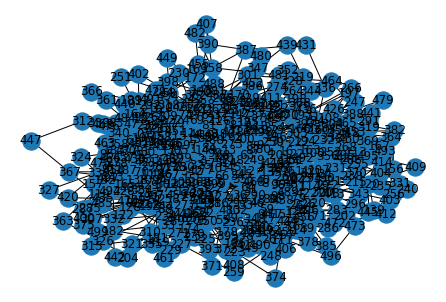

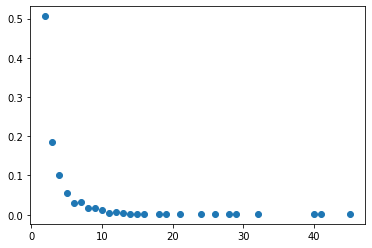

In [5]:
from math import log
import numpy as np # For logarithmic scale 

N = 500
m = 2 

# BA network 
BA = nx.barabasi_albert_graph(N,m)
# Visualize netow
nx.draw(BA, with_labels=True)
plt.show()

# Use my degree function to compute the degree distribution 
deg, eprob = degree_distribution(BA)

# Visualize the degree distribution 
plt.plot(deg, eprob,'o')
plt.show()




### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [5]:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [6]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [7]:
# Create a new column timestamp_dt with date in datetime format 
data['timestamp_dt'] = pd.to_datetime(data['timestamp'], unit = 's')

# Create function where you can input date in datetime format. Takes the whole sample as default. 
def timeslicer(data, t0 = data.timestamp_dt.min(), t1 = data.timestamp_dt.max()):
    
    # Subset of the pandas dataframe
    data_slice = data.loc[data.timestamp_dt.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_slice = data_slice.groupby(['user1', 'user2']).size().reset_index(name='weight')
    
    return nx.from_pandas_edgelist(data_slice, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

DG = timeslicer(data,'2008-01-23','2009-01-23')

# Print the number of nodes and edges 
print('Number of nodes:',DG.number_of_nodes())
print('Numbver of edges:',DG.number_of_edges())


Number of nodes: 44402
Numbver of edges: 201702


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

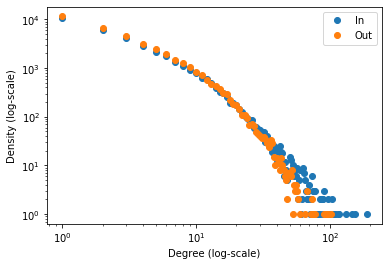

In [8]:
# Compute in and out degrees 

def degree_distribution(degree_input):
    
    degree = sorted([d for n, d in degree_input], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree)
    degree, degreeCount = zip(*degreeCount.items())
    
    return degree, degreeCount 

# From dir(nx.DiGraph) we know that we can use `out_degree` and `in_degree`

# In degrees 
degree_in, count_in = degree_distribution(DG.in_degree())

# Out degrees 
degree_out, count_out = degree_distribution(DG.out_degree())


# Plot figure
plt.plot(degree_in, count_in,'o', label = 'In')
plt.plot(degree_out, count_out,'o', label = 'Out')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log-scale)')
plt.ylabel('Density (log-scale)')
plt.legend()
plt.show()

> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

(array([  45.,   62.,  101.,  200.,  254.,  351.,  523.,  700., 1011.,
        1151., 1595., 1501., 1815., 1754., 1600., 1752., 1121., 1065.,
         537.,  898.,  957.,  146.,  155.,  802.]),
 array([0.00498213, 0.00621378, 0.00774992, 0.00966581, 0.01205533,
        0.01503558, 0.01875259, 0.02338849, 0.02917046, 0.03638181,
        0.04537591, 0.05659348, 0.07058419, 0.08803361, 0.10979677,
        0.13694008, 0.17079362, 0.21301622, 0.26567686, 0.33135595,
        0.41327184, 0.51543851, 0.64286223, 0.8017869 , 1.        ]),
 <a list of 24 Patch objects>)

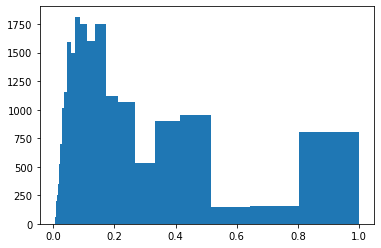

In [18]:
# Compute the local clustering coefficients
clusters = nx.clustering(DG) 
#print(clusters)

plt.hist(sorted(clusters.values()), bins=np.logspace(np.log(0.1), np.log(1.0),25))
# Histogram ?? 


We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*


I did not manage to do this... 